In [1]:
import pandas as pd 
import numpy as np 
import csv  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
crashes_data = pd.read_csv('data/Traffic_Crashes_-_Crashes.csv', low_memory=False)
crashes_data.drop(crashes_data.columns[np.r_[1,2,5,10:13,15,17:20,21,24:35,36:43,48]], axis=1, inplace=True)

In [4]:
people_data = pd.read_csv('data/Traffic_Crashes_-_People.csv', low_memory=False)
people_data.drop(people_data.columns[np.r_[3:10,11,12,13,17:30]], axis=1, inplace=True)

In [5]:
vehicles_data = pd.read_csv('data/Traffic_Crashes_-_Vehicles.csv', low_memory=False)
vehicles_data.drop(vehicles_data.columns[np.r_[0,2:13,16,18:38,39:72]], axis=1, inplace=True)

In [6]:
people_crashes_data = crashes_data.merge(people_data, on='CRASH_RECORD_ID')
df = people_crashes_data.merge(vehicles_data, on='CRASH_RECORD_ID')

In [7]:
df['MOST_SEVERE_INJURY'] = df['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 'low risk', 
                                                                         'REPORTED, NOT EVIDENT': 'low risk',
                                                                         'NONINCAPACITATING INJURY': 'medium risk',
                                                                         'INCAPACITATING INJURY': 'high risk',
                                                                         'FATAL': 'high risk'})


In [8]:
df['MOST_SEVERE_INJURY'].value_counts()

low risk       2208342
medium risk     255076
high risk        65420
Name: MOST_SEVERE_INJURY, dtype: int64

In [9]:
low_risk_percentage = (2208342/(2208342+255076+65420))*100
print(low_risk_percentage)

87.32635305227144


In [10]:
med_risk_percentage = (255076/(2208342+255076+65420))*100
print(med_risk_percentage)

10.086688036165228


In [11]:
high_risk_percentage = (65420/(2208342+255076+65420))*100
print(high_risk_percentage)

2.5869589115633347


In [12]:
df.dropna(subset=['MOST_SEVERE_INJURY'], inplace=True)

In [13]:
df.duplicated().sum()

73591

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df = df.drop(['CRASH_DATE'], axis=1)

In [16]:
X = df.drop(["MOST_SEVERE_INJURY","CRASH_RECORD_ID"], axis=1)
y = df['MOST_SEVERE_INJURY']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42)

In [17]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
X_train['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True )
X_train['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True )

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
X_train['SEX'].fillna('X', inplace=True)

X_train['SEX'] = X_train['SEX'].map({'M': 'M', 
                           'F': 'F',
                           'X': 'Unknown'})
X_train['SEX'].value_counts()

<ipython-input-19-6614c1745b58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['SEX'] = X_train['SEX'].map({'M': 'M',


M          894803
F          650139
Unknown    173730
Name: SEX, dtype: int64

In [20]:
X_train['SAFETY_EQUIPMENT'].fillna('USAGE UNKNOWN', inplace=True)
X_train['AIRBAG_DEPLOYED'].fillna('DEPLOYMENT UNKNOWN', inplace=True)
X_train['EJECTION'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_DEFECT'].fillna('UNKNOWN', inplace=True)
X_train['VEHICLE_TYPE'].fillna('UNKNOWN/NA', inplace=True)
X_train['VEHICLE_USE'].fillna('UNKNOWN/NA', inplace=True)
X_train['MANEUVER'].fillna('UNKNOWN/NA', inplace=True)
X_train['FIRST_CONTACT_POINT'].fillna('UNKNOWN', inplace=True)

In [21]:
X_train.isnull().sum()

POSTED_SPEED_LIMIT         0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
PERSON_ID                  0
PERSON_TYPE                0
SEX                        0
SAFETY_EQUIPMENT           0
AIRBAG_DEPLOYED            0
EJECTION                   0
VEHICLE_DEFECT             0
VEHICLE_TYPE               0
VEHICLE_USE                0
MANEUVER                   0
FIRST_CONTACT_POINT        0
dtype: int64

In [22]:
X_train_baseline = X_train.select_dtypes(include=['int64','float64'])
X_test_baseline = X_test.select_dtypes(include=['int64','float64'])

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000)
model.fit(X_train_baseline,y_train)
y_hat = model.predict(X_train_baseline)

acc = accuracy_score(y_train,y_hat)

In [23]:
acc

0.8779575160356368

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_hat)

array([[      0,   41494,       8],
       [     15, 1508913,     272],
       [     46,  167916,       8]])

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718672 entries, 373803 to 2288931
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   POSTED_SPEED_LIMIT       int64  
 1   DEVICE_CONDITION         object 
 2   WEATHER_CONDITION        object 
 3   LIGHTING_CONDITION       object 
 4   FIRST_CRASH_TYPE         object 
 5   ROADWAY_SURFACE_COND     object 
 6   ROAD_DEFECT              object 
 7   CRASH_TYPE               object 
 8   DAMAGE                   object 
 9   PRIM_CONTRIBUTORY_CAUSE  object 
 10  SEC_CONTRIBUTORY_CAUSE   object 
 11  CRASH_HOUR               int64  
 12  CRASH_DAY_OF_WEEK        int64  
 13  CRASH_MONTH              int64  
 14  LATITUDE                 float64
 15  LONGITUDE                float64
 16  PERSON_ID                object 
 17  PERSON_TYPE              object 
 18  SEX                      object 
 19  SAFETY_EQUIPMENT         object 
 20  AIRBAG_DEPLOYED          object 
 21  EJE

In [26]:
plot_confusion_matrix(model, X_train, y_train)  

ValueError: could not convert string to float: 'FUNCTIONING PROPERLY'

In [30]:
tree_clf = DecisionTreeClassifier(max_depth=2) 

tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_train)
y_pred

ValueError: could not convert string to float: 'FUNCTIONING PROPERLY'

In [31]:
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy: {0}".format(acc))

NameError: name 'y_pred' is not defined

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

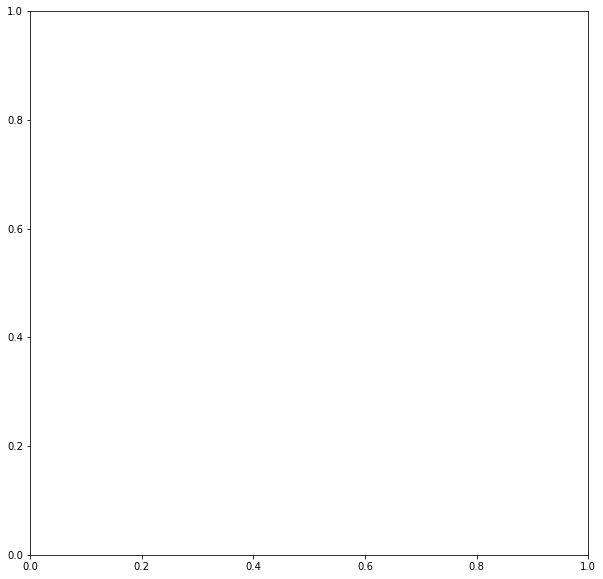

In [32]:
f,ax = plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);